In [1]:
import numpy as np # l|inear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import sklearn
import random
import tensorflow as tf
import os
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# base_path and labels.
base_path = 'D:/Dataset_ISIC2019'
labels = ['AK', 'BCC', 'BKL' ,'DF' ,'MEL' ,'NV' , 'SCC' , 'VASC']

In [4]:
# Constants
IMAGE_SIZE = 224
BATCH_SIZE = 64
VERBOSE = 1

In [5]:
# Dataset from the training folder.
x_train=[]
y_train=[]
for i in labels:
    folderPath = os.path.join(os.path.join(base_path,'train'),i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
        x_train.append(img)
        y_train.append(i)
print('Training dataset Loading complete.')
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train, y_train = sklearn.utils.shuffle(x_train, y_train, random_state=0)

print('Testing dataset Loading complete.')

100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:03<00:00, 32.61it/s]


Training dataset Loading complete.
Testing dataset Loading complete.


In [6]:
# Dataset from the training folder.
x_test=[]
y_test=[]
for i in labels:
    folderPath = os.path.join(os.path.join(base_path,'test'),i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
        x_test.append(img)
        y_test.append(i)
print('Training dataset Loading complete.')
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test, y_test = sklearn.utils.shuffle(x_test, y_test, random_state=0)

print('Testing dataset Loading complete.')

100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [00:02<00:00, 30.00it/s]


Training dataset Loading complete.
Testing dataset Loading complete.


In [7]:
x_val=[]
y_val=[]
for i in labels:
    folderPath = os.path.join(os.path.join(base_path,'val'),i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
        x_val.append(img)
        y_val.append(i)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_val, y_val = sklearn.utils.shuffle(x_val, y_val, random_state=0)

print('validation dataset Loading complete.')

100%|██████████████████████████████████████████████████████████████████████████████████| 55/55 [00:01<00:00, 32.00it/s]


validation dataset Loading complete.


In [8]:
# j=0
# for i in labels:
#     j=0
#     while True :
#         if y_train[j]==i:
#             plt.figure(figsize = (5,5))
#             plt.imshow(x_train[j])
#             plt.title(y_train[j])
#             break
#         j+=1

In [9]:
# datagen = ImageDataGenerator(
#     featurewise_center=False,
#     samplewise_center=False,
#     featurewise_std_normalization=False,
#     samplewise_std_normalization=False,
#     zca_whitening=False,
#     rotation_range=30,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.2,
#     horizontal_flip=True, vertical_flip=False
# )

# datagen.fit(x_train)
x_train.shape

(12523, 224, 224, 3)

In [10]:
# # Splitting of dataset for Testing.
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, random_state=0)

# print("Shapes X : Train :",x_train.shape,  " Test :",x_test.shape)
# print("Shapes Y : Train :",y_train.shape,  " Test :",y_test.shape)

In [11]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [12]:
y_val_new = []
for i in y_val:
    y_val_new.append(labels.index(i))
y_val = y_val_new
y_val = tf.keras.utils.to_categorical(y_val)

In [13]:
import tensorflow as tf
tf.keras.applications.mobilenet.preprocess_input

<function keras.src.applications.mobilenet.preprocess_input(x, data_format=None)>

In [14]:
# Importing the model and initializing.
from tensorflow.keras.applications import MobileNetV2
mobilenet = MobileNetV2(weights = 'imagenet',include_top=False,input_shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

In [15]:
# Adding Top Layers.
model1 = mobilenet.output
model1 = tf.keras.layers.GlobalAveragePooling2D()(model1)
model1 = tf.keras.layers.Dropout(0.5)(model1)
model1 = tf.keras.layers.Dense(8, activation = 'softmax')(model1)
model1 = tf.keras.models.Model(inputs = mobilenet.input, outputs = model1)

# Model summary.
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [16]:
# Compiling Model
# model1.compile(loss = 'categorical_crossentropy', optimizer ='sgdm', metrics=['accuracy'])
# # Callbacks.
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
# tensorboard = TensorBoard(log_dir = 'logs')
# checkpoint = ModelCheckpoint("effnet1.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
# reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.0001,mode='auto',verbose=VERBOSE)

In [17]:
# Compiling Model
model1.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])
# Callbacks.
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("mobilenet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.0001,mode='auto',verbose=VERBOSE)

In [18]:
# Fitting the model
history1 = model1.fit(x_train, y_train, validation_data=(x_val,y_val), epochs = 50, verbose =VERBOSE, batch_size=BATCH_SIZE, callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/50
196/196 [==============================] - ETA: 0s - loss: 1.0015 - accuracy: 0.6460
Epoch 1: val_accuracy improved from -inf to 0.52240, saving model to mobilenet.h5


C:\Users\jentl\AppData\Local\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


196/196 [==============================] - 1862s 9s/step - loss: 1.0015 - accuracy: 0.6460 - val_loss: 7.3981 - val_accuracy: 0.5224 - lr: 0.0010
Epoch 2/50
196/196 [==============================] - ETA: 0s - loss: 0.7712 - accuracy: 0.7261
Epoch 2: val_accuracy improved from 0.52240 to 0.53345, saving model to mobilenet.h5
196/196 [==============================] - 1805s 9s/step - loss: 0.7712 - accuracy: 0.7261 - val_loss: 8.4563 - val_accuracy: 0.5334 - lr: 0.0010
Epoch 3/50
196/196 [==============================] - ETA: 0s - loss: 0.6736 - accuracy: 0.7588
Epoch 3: val_accuracy improved from 0.53345 to 0.55320, saving model to mobilenet.h5
196/196 [==============================] - 1794s 9s/step - loss: 0.6736 - accuracy: 0.7588 - val_loss: 8.3987 - val_accuracy: 0.5532 - lr: 0.0010
Epoch 4/50
196/196 [==============================] - ETA: 0s - loss: 0.5823 - accuracy: 0.7894
Epoch 4: val_accuracy did not improve from 0.55320
196/196 [==============================] - 1808s 9s/s

196/196 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 0.9992
Epoch 27: val_accuracy did not improve from 0.73561
196/196 [==============================] - 1862s 10s/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 2.0896 - val_accuracy: 0.7299 - lr: 9.0000e-05
Epoch 28/50
196/196 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9995
Epoch 28: val_accuracy did not improve from 0.73561
196/196 [==============================] - 1863s 10s/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 1.9919 - val_accuracy: 0.7348 - lr: 9.0000e-05
Epoch 29/50
196/196 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.9996
Epoch 29: val_accuracy did not improve from 0.73561

Epoch 29: ReduceLROnPlateau reducing learning rate to 2.700000040931627e-05.
196/196 [==============================] - 1861s 9s/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 2.0359 - val_accuracy: 0.7322 - lr: 9.0000e-05
Epoch 30/50
196/196 [==============

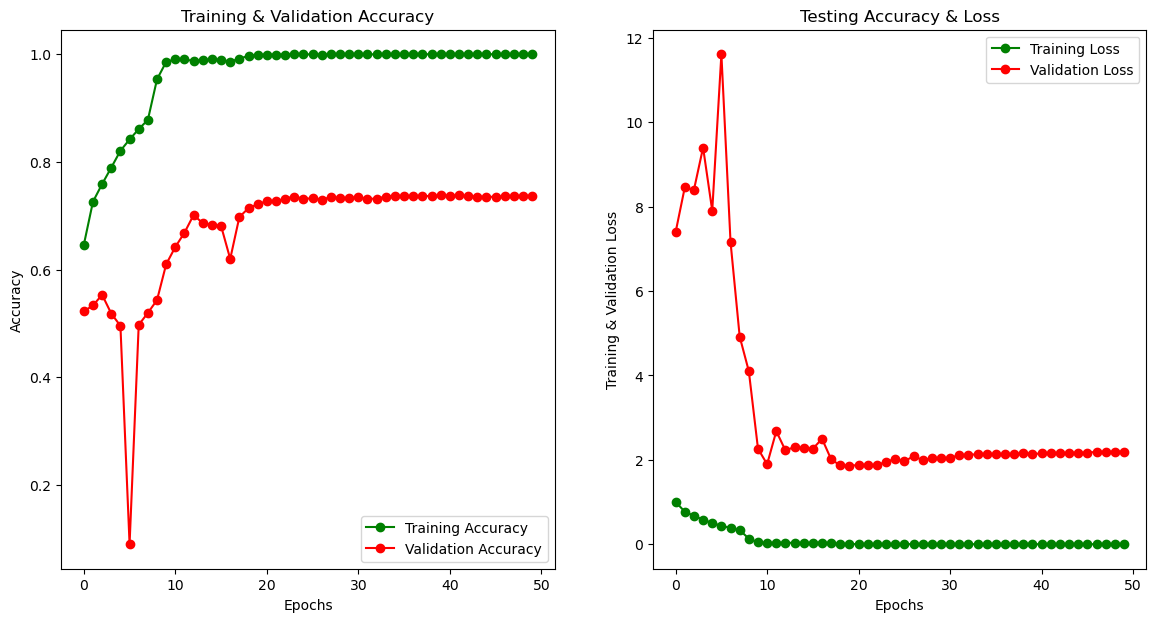

In [19]:
epochs = [i for i in range(50)]
fig, ax = plt.subplots(1,2)
train_acc = history1.history['accuracy']
train_loss = history1.history['loss']
val_acc = history1.history['val_accuracy']
val_loss = history1.history['val_loss']
fig.set_size_inches(14, 7)

ax[0].plot(epochs, train_acc, 'go-', label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, train_loss, 'g-o', label ='Training Loss')
ax[1].plot(epochs, val_loss, 'r-o', label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')
plt.show()

In [20]:
# Evaluating Model.
result1=model1.evaluate(x_test, y_test)
print("Testing Loss :", result1[0])
print("Testing Accuracy :", result1[1]*100, "%")

248/248 [==============================] - 189s 763ms/step - loss: 2.1669 - accuracy: 0.7076
Testing Loss : 2.1669304370880127
Testing Accuracy : 70.75912356376648 %


In [21]:
predictions1 = model1.predict(x_test)
predictions1 = np.argmax(predictions1, axis = 1)
y_test_edit = np.argmax(y_test , axis = 1)

248/248 [==============================] - 190s 762ms/step


In [22]:
# Classification report.
from sklearn.metrics import classification_report
cf_report = sklearn.metrics.classification_report(y_test_edit, predictions1 )
print(cf_report)

              precision    recall  f1-score   support

           0       0.50      0.44      0.47       291
           1       0.74      0.82      0.77      1039
           2       0.62      0.51      0.56       865
           3       0.57      0.40      0.47        62
           4       0.50      0.61      0.55      1397
           5       0.83      0.80      0.81      3967
           6       0.51      0.39      0.44       206
           7       0.86      0.68      0.76        90

    accuracy                           0.71      7917
   macro avg       0.64      0.58      0.60      7917
weighted avg       0.71      0.71      0.71      7917



<Axes: >

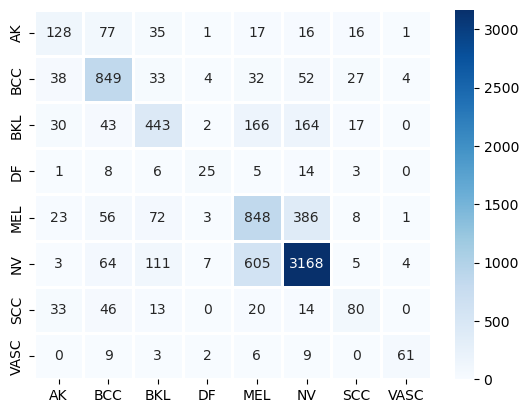

In [23]:
cf_matrix = sklearn.metrics.confusion_matrix(y_test_edit, predictions1)
sns.heatmap(cf_matrix, cmap = 'Blues', linewidth = 1, annot = True, xticklabels=labels, yticklabels=labels, fmt='d')

In [24]:
model1.save("mobilenet1.h5")

C:\Users\jentl\AppData\Local\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
